# Building a Chatbot from Scratch

##### In this project we will build a chatbot from scratch using the corenell University's Movie Dialogue corpus.
##### We will be using a deep learning based architecture with the main components as a lstm based encoder and decoder.

In [1]:
!python --version

Python 3.10.12


In [2]:
!pip install keras==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.3/304.3 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.1.2 which is incompatible.


In [3]:
!pip install  nltk==3.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.4.1-py3-none-any.whl size=1445938 sha256=2617b1a2558ad298b473f6f47ff2429e4cda16840c4c87e9946d29775ce22797
  Stored in directory: /root/.cache/pip/wheels/90/d3/44/40093a2c426178152412db9ad7dbf514ba3f13725b3e53f60f
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [4]:
!pip install git+https://github.com/MeMartijn/updated-sklearn-crfsuite.git #egg=sklearn_crfsuite

  Cloning https://github.com/MeMartijn/updated-sklearn-crfsuite.git to /tmp/pip-req-build-5ckcdh8h
  Running command git clone --filter=blob:none --quiet https://github.com/MeMartijn/updated-sklearn-crfsuite.git /tmp/pip-req-build-5ckcdh8h
  Resolved https://github.com/MeMartijn/updated-sklearn-crfsuite.git to commit 675038761b4405f04691a83339d04903790e2b95
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 12.9 MB/s eta 0:00:00
  Created wheel for sklearn-crfsuite: filename=sklearn_crfsuite-0.3.6-py2.py3-none-any.whl size=10866 sha256=1c52e977fd65172dfa84361190bc46d12358f0f8626e60239c7e95ece5998e97
  Stored in directory: /tmp/pip-ephem-wheel-cache-isye_gzx/wheels/0b/bc/07/bd75a6f5fa2bf2ea05a5aad8d9ac66d2b5aab93dfd4e1a89de
Successfully built sklearn-crfsuite


In [5]:
!pip3 show keras

Name: Keras
Version: 2.1.2
Summary: Deep Learning for Python
Home-page: https://github.com/fchollet/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, pyyaml, scipy, six
Required-by: tensorflow


In [6]:
!pip show nltk

Name: nltk
Version: 3.4.1
Summary: Natural Language Toolkit
Home-page: http://nltk.org/
Author: Steven Bird
Author-email: stevenbird1@gmail.com
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: six
Required-by: textblob


In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)


1.2.2


In [ ]:
!pip show numpy

Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: albumentations, altair, arviz, astropy, autograd, blis, bokeh, bqplot, chex, cmdstanpy, contourpy, cufflinks, cupy-cuda11x, cvxpy, datascience, db-dtypes, dopamine-rl, ecos, flax, folium, geemap, gensim, gym, h5py, holoviews, hyperopt, ibis-framework, imageio, imbalanced-learn, imgaug, jax, jaxlib, Keras, librosa, lida, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, ml-dtypes, mlxtend, moviepy, music21, nibabel, numba, numexpr, opencv-contrib-python, opencv-python, opencv-python-headless, opt-einsum, optax, orbax-checkpoint, osqp, pandas, pandas-gbq, patsy, plotnine, prophet, pyarrow, pycocotools, pyerfa, pymc, pytensor, python-louvain, PyWavelets, qdldl, qudida, scikit-image, scikit-learn, scipy, scs, seabo

Did some libraby level changes in 3.10 version to import keras

Error faced is :-

ImportError: cannot import name 'Iterable' from 'collections' ( /usr/local/lib/python3.10/dist-packages/keras/callbacks.py )

In [7]:
from collections.abc import Iterable

In [8]:
!cp /usr/local/lib/python3.10/dist-packages/keras/callbacks.py /usr/local/lib/python3.10/dist-packages/keras/callbacks_bak.py

In [9]:
!cat /usr/local/lib/python3.10/dist-packages/keras/callbacks.py | grep -i 'collections'

from collections import deque
from collections import OrderedDict
from collections import Iterable


In [10]:
!sudo sed -i -e 's/from collections import Iterable/from collections.abc import Iterable/' /usr/local/lib/python3.10/dist-packages/keras/callbacks.py

In [11]:
!cat /usr/local/lib/python3.10/dist-packages/keras/callbacks.py | grep -i 'collections'

from collections import deque
from collections import OrderedDict
from collections.abc import Iterable


In [12]:
import keras

Using TensorFlow backend.


In [13]:
from keras.models import Model
#from keras.layers.recurrent import LSTM
from keras.layers import Dense, Input, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from collections import Counter
import nltk
import numpy as np
from sklearn.model_selection import train_test_split

In [14]:
import keras
import nltk
import numpy
import sklearn

Please make sure that the version of the respective packages are met to the requirement. sklearn and numpy can't be downgraded in collab so using the standard ones and applying any hacks as required.

In [15]:
assert keras.__version__=='2.1.2'
assert nltk.__version__=='3.4.1'
#assert sklearn.__version__=='0.21.2'
#assert numpy.__version__=='1.12.1'

Download the glove model available at https://nlp.stanford.edu/projects/glove/

Specification : Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors, 1.42 GB download): glove.twitter.27B.zip


you can download it with 'wget' or can directly put the embedding zip file inside 'embedding_data' folder and unzip it.

In [ ]:
! curl -O http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1449M  100 1449M    0     0  5167k      0  0:04:47  0:04:47 --:--:-- 5090k


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls /content/drive/MyDrive/INDUSTRY/

clean_text_stop_word_removed.txt              moviequotes.memorable_quotes.txt
INDUS_TOKEN_KERA_latest_16_2_30_PM.ipynb      moviequotes.scripts.txt
movie_lines_cleaned.txt                       README.v1.0.txt
moviequotes.memorable_nonmemorable_pairs.txt


In [ ]:
ls

clean_text_whitelisted_removal_18.txt     glove.twitter.27B.zip
clean_text_whitelisted_removal_18_v3.txt  sample_data/


In [ ]:
!unzip glove*

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  


In [ ]:
import numpy as np


In [ ]:
RAND_STATE=np.random.seed(42)
BATCH_SIZE = 32
NUM_EPOCHS = 10
GLOVE_EMBEDDING_SIZE = 100
HIDDEN_UNITS = 256
MAX_INPUT_SEQ_LENGTH = 40
MAX_TARGET_SEQ_LENGTH = 40
MAX_VOCAB_SIZE = 10000
DATA_SET_NAME = 'cornell'
DATA_PATH = 'clean_text_whitelisted_removal_18_v3.txt'
GLOVE_MODEL = "glove.twitter.27B.100d.txt"
WHITELIST = 'abcdefghijklmnopqrstuvwxyz1234567890?.,'
WEIGHT_FILE_PATH =  DATA_SET_NAME + '/word-glove-weights.h5'

Load the glove word embedding in to a dictionary where the **key** is a unique **word token** and the **value** is a **d** dimension vector

# Test-1

Loading the Glove Vector Model and loading the dictionary which would be used in subsequent code to get the word embeddings.

In [ ]:
def load_glove_vector():
    _word2embedding = {}
    file = open(GLOVE_MODEL, mode='rt', encoding='utf8')
    for line in file:
        '''write here. write your code to load the data in to the dictionary
        make sure the value is a numpy array of size 100
        max  3 to 6 lines of code'''
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        _word2embedding[word] = vector
    file.close()
    return _word2embedding

In [ ]:
word2embedding = load_glove_vector()

Verify the model and if its doing desired mappning.

In [ ]:
type(word2embedding)

dict

In [ ]:
word2embedding['do']

array([-2.3741e-01, -2.2434e-01,  9.1622e-01, -5.8550e-02, -1.6511e-01,
        2.5111e-01,  6.0232e-01, -5.0023e-01,  5.4699e-01,  6.9742e-01,
       -2.0822e-01, -1.1138e+00, -5.3540e+00,  4.4314e-01, -5.4168e-01,
       -1.7297e-01, -8.2312e-01, -2.0724e-01,  5.2782e-01, -2.1240e-01,
        2.9266e-02, -7.1848e-02, -1.3079e-01, -7.4409e-02,  3.6398e-01,
       -1.7687e+00,  5.0954e-01,  7.1843e-01,  1.6063e-01, -1.3972e-01,
        9.4257e-01, -4.2210e-01,  4.7313e-02, -4.6057e-01, -1.0714e+00,
       -2.8972e-03,  1.9650e-01, -5.9106e-01, -1.1389e+00,  1.5337e-01,
       -2.1414e+00,  7.8533e-01,  1.0681e-01, -1.0814e-01, -6.3045e-01,
        2.1288e-01, -9.9607e-02, -4.1917e-01, -5.7476e-01, -1.1047e+00,
        5.3964e-01,  4.9028e-01,  2.6830e-01,  2.7167e-01,  1.6113e-01,
        4.2814e-01, -9.7108e-01,  7.5670e-01, -2.8024e-02,  5.9043e-01,
       -2.5249e-01, -1.4199e-01,  3.4776e-01,  8.7260e-02,  1.6208e-01,
       -1.3040e-01,  2.7808e-02, -2.5873e-01, -1.1011e-02,  1.36

In [ ]:
type(word2embedding['everything'])

numpy.ndarray

# Check-1

In [ ]:
assert len(word2embedding.keys())==1193514
for key in word2embedding.keys():
    try:
        assert len(word2embedding[key])==100
    except AssertionError:
        print (key,len(word2embedding[key]))

-0.32053 99


# Data Preparation

In [ ]:
target_counter = Counter()
lines = open('clean_text_whitelisted_removal_18_v3.txt', 'rt', encoding='utf8').read().split('\n')
input_texts = []
target_texts = []
prev_words = []

In [ ]:
import re

In [ ]:
def clean_text(text):
    '''Clean text by removing unnecessary characters and altering the format of words.'''

    text = text.lower()

    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    text = re.sub(r'\*', "", text)
    text = re.sub(r'\&', "", text)
    text = re.sub(r'\%', "", text)
    text = re.sub(r'\^', "", text)
    text = re.sub(r'\_', "", text)
    text = re.sub(r'\$', " ", text)
    text = re.sub(r'\[', " ", text)
    text = re.sub(r'\]', " ", text)

    return text

In [ ]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
DATA_PATH1 = '/content/clean_text_whitelisted_removal_18_v3.txt'

In [ ]:
lines3 = open(DATA_PATH1, 'rt', encoding='utf8').read().split('\n')

In [ ]:
import re

In [ ]:
clean_list=[]

for line in lines3:
  word_text = line.split()
  temp = []
  for item in word_text:
    #print(item)
    item1 = clean_text(item)
    temp.append(item1)
  #print(temp)
  clean_list.append(temp)


In [ ]:
clean_list[:10]

[['they', 'do', 'not'],
 ['they', 'do', 'to'],
 ['i', 'hope', 'so'],
 ['she', 'okay'],
 ["let's", 'go'],
 ['wow'],
 ['okay', 'you', 'are', 'gonna', 'need', 'to', 'learn', 'how', 'to', 'lie'],
 ['no'],
 ['i',
  'am',
  'kidding',
  'you',
  'know',
  'how',
  'sometimes',
  'you',
  'just',
  'become',
  'this',
  'persona',
  'and',
  'you',
  'do',
  'not',
  'know',
  'how',
  'to',
  'quit'],
 ['like', 'my', 'fear', 'of', 'wearing', 'pastels']]

In [ ]:
with open('clean_text_whitelisted1.txt', 'w') as f:
      for line in clean_list:
          listToStr = ' '.join([str(elem) for i,elem in enumerate(line)])
          f.write(f"{listToStr}\n")

In [ ]:
ls -l

total 5251264
-rw-r--r-- 1 root root    9006648 Nov 18 02:55 clean_text_whitelisted_removal_18_v3.txt
-rw-rw-r-- 1 root root 1021669379 Aug 14  2014 glove.twitter.27B.100d.txt
-rw-rw-r-- 1 root root 2057590469 Aug 14  2014 glove.twitter.27B.200d.txt
-r--r--r-- 1 root root  257699726 Aug 14  2014 glove.twitter.27B.25d.txt
-rw-rw-r-- 1 root root  510887943 Aug 14  2014 glove.twitter.27B.50d.txt
-rw-r--r-- 1 root root 1520408563 Nov 18 03:02 glove.twitter.27B.zip
drwxr-xr-x 1 root root       4096 Nov 16 14:27 sample_data/


In [ ]:
cp clean_text_whitelisted1.txt /content/drive/MyDrive/INDUSTRY/

In [ ]:
DATA_PATH1 = 'clean_text_whitelisted_removal_18_v3.txt'

lines3 = open(DATA_PATH1, 'rt', encoding='utf8').read().split('\n')

In [ ]:
word_text = []

for sent in lines3:
    word_text.append(word_tokenize(sent))

#print(word_text)
#print('**********************************************')
print(len(word_text))

287870


In [ ]:
word_text[:2]

[]

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_en = set(stopwords.words("english"))
print(stopwords_en)

{"won't", 'at', 'her', 'before', 'out', 'what', 'who', 'didn', 'his', 't', 'm', "it's", "wouldn't", 'for', 'being', 'how', 'were', 'so', 'has', 'our', 'himself', 'down', 'yourself', 'those', 'did', 'was', 'above', 'is', "haven't", 'by', 'there', 'hadn', 'when', 'me', 'should', 'does', 'he', 'once', 'of', "don't", "wasn't", 'each', 'no', 'wasn', 'i', 'against', 'isn', "you'd", 'mustn', "mustn't", "you've", 'they', 'any', 'most', 'under', 'needn', 'she', 'wouldn', 'some', 'yourselves', 'its', 'theirs', 'are', 'nor', 're', 'having', "needn't", 'hasn', 'other', 'do', 'been', 'after', 'we', 'my', 'in', 'ours', "she's", 'their', "shouldn't", 'mightn', 'a', 'now', 'haven', 'here', "shan't", 'not', 'or', 'don', 'aren', 'own', 'below', 'off', 'such', 'you', 'just', 'doesn', 'itself', 'can', 'd', "you'll", 'o', 'ain', "you're", 'shouldn', 'be', 'ma', 'to', 'with', 'and', 'won', 'then', 'had', 'if', 'very', 'between', 'shan', 's', 'again', 'through', "doesn't", 'myself', 'from', 'only', 'same', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
len(stopwords_en)

179

In [ ]:
type(stopwords_en)

set

In [ ]:
word_text_filtered1 = []

for item in word_text:
  temp=[]
  for word in item:
    if word not in stopwords_en:
        #print(word)
        temp.append(word)
  if(len(temp) != 0):
    word_text_filtered1.append(temp)


In [ ]:
len(word_text_filtered1)

287869

In [ ]:
word_text_filtered1[:10]

[['hope'],
 ['okay'],
 ['let', "'s", 'go'],
 ['wow'],
 ['okay', 'gon', 'na', 'need', 'learn', 'lie'],
 ['kidding', 'know', 'sometimes', 'become', 'persona', 'know', 'quit'],
 ['like', 'fear', 'wearing', 'pastels'],
 ['real'],
 ['good', 'stuff'],
 ['figured', 'would', 'get', 'good', 'stuff', 'eventually']]

Create a list of stop words and remove them the original file.

In [ ]:
line = open('stopwords.txt', 'rt', encoding='utf8').read().split('\n')

In [ ]:
line1 = open('stopwords_v2.txt', 'rt', encoding='utf8').read().split('\n')

In [ ]:
st_words = {" "}
for l1 in line1:
  st_words.add(l1)


In [ ]:
for item in line[:2]:
  print(item)

s
 


In [ ]:
len(st_words)

15

In [ ]:
st_words

{'',
 ' ',
 "'insurance",
 'armymy',
 'bullshitover',
 'bureausembassies',
 'deadhe',
 'gentlemenii',
 'inspiredmakes',
 'jibbiting',
 'listenif',
 'mayst',
 'togetherwe',
 'ufutureu',
 'whatsay'}

In [ ]:
word_text_filtered1[:5]

[['hope'],
 ['okay'],
 ['let', "'s", 'go'],
 ['wow'],
 ['okay', 'gon', 'na', 'need', 'learn', 'lie']]

In [ ]:
word_tokenize

<function nltk.tokenize.word_tokenize(text, language='english', preserve_line=False)>

In [ ]:
word_text_filtered1[:10]

[['hope'],
 ['okay'],
 ['let', "'s", 'go'],
 ['wow'],
 ['okay', 'gon', 'na', 'need', 'learn', 'lie'],
 ['kidding', 'know', 'sometimes', 'become', 'persona', 'know', 'quit'],
 ['like', 'fear', 'wearing', 'pastels'],
 ['real'],
 ['good', 'stuff'],
 ['figured', 'would', 'get', 'good', 'stuff', 'eventually']]

Multiple iterations of stop word removal was performed over the original file and the file "clean_text_whitelisted_removal_18_v3.txt" is the final file on which the model would be trained.

In [ ]:
ls -l

total 5329696
-rw-r--r-- 1 root root    9360275 Nov 17 11:24 clean_text_stop_word_removed.txt
-rw-r--r-- 1 root root   16312686 Nov 17 12:48 clean_text_whitelisted1.txt
-rw-r--r-- 1 root root    9016168 Nov 17 20:40 clean_text_whitelisted_removal_18.txt
-rw-r--r-- 1 root root    9006819 Nov 17 21:10 clean_text_whitelisted_removal_18_v1.txt
-rw-r--r-- 1 root root   15073934 Nov 17 21:24 clean_text_whitelisted_removal_18_v2.txt
-rw-r--r-- 1 root root    9006671 Nov 17 21:33 clean_text_whitelisted_removal_18_v3.txt
-rw-r--r-- 1 root root   16346490 Nov 17 11:11 clean_text_whitelisted.txt
drwx------ 5 root root       4096 Nov 17 14:37 drive/
-rw-rw-r-- 1 root root 1021669379 Aug 14  2014 glove.twitter.27B.100d.txt
-rw-rw-r-- 1 root root 2057590469 Aug 14  2014 glove.twitter.27B.200d.txt
-r--r--r-- 1 root root  257699726 Aug 14  2014 glove.twitter.27B.25d.txt
-rw-rw-r-- 1 root root  510887943 Aug 14  2014 glove.twitter.27B.50d.txt
-rw-r--r-- 1 root root 1520408563 Nov 17 10:33 glove.twitter

Installing a new version of Keras as the Tokenizer was not working in version
2.1.2

In [ ]:
!pip install keras==2.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: Keras 2.1.2
    Uninstalling Keras-2.1.2:
      Successfully uninstalled Keras-2.1.2


In [ ]:
import keras
from keras.preprocessing.text import Tokenizer
import tensorflow as tf

In [ ]:
dataset = tf.data.TextLineDataset(['clean_text_whitelisted_removal_18.txt'])

In [ ]:
tokenizer_new = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer_new.fit_on_texts([n.numpy().decode("utf-8")for n in list(dataset.map(lambda x: x))])

In [ ]:
def tokenize(x):
  return tokenizer_new.texts_to_sequences(x)


In [ ]:
def tokenize1(x):
  return tokenizer_new.sequences_to_texts(x)

In [ ]:
tokenize(['I believe we share an art instructor','90210'])

[[81, 914, 865, 14498], []]

In [ ]:
tokenize(['START','start'])

[[194], [194]]

In [ ]:
tokenize1([[14218, 1053, 85, 1088, 23, 180, 2],[2, 180]])

["hopping definitely years faith back miss 's", "'s miss"]

In [ ]:
target_word2idx = {}
target_idx2word = {}

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
DATA_PATH1 = 'clean_text_whitelisted_removal_18_v3.txt'

lines3 = open(DATA_PATH1, 'rt', encoding='utf8').read().split('\n')

In [ ]:
ls -l


total 5329696
-rw-r--r-- 1 root root    9360275 Nov 17 11:24 clean_text_stop_word_removed.txt
-rw-r--r-- 1 root root   16312686 Nov 17 12:48 clean_text_whitelisted1.txt
-rw-r--r-- 1 root root    9016168 Nov 17 20:40 clean_text_whitelisted_removal_18.txt
-rw-r--r-- 1 root root    9006819 Nov 17 21:10 clean_text_whitelisted_removal_18_v1.txt
-rw-r--r-- 1 root root   15073934 Nov 17 21:24 clean_text_whitelisted_removal_18_v2.txt
-rw-r--r-- 1 root root    9006662 Nov 17 21:44 clean_text_whitelisted_removal_18_v3.txt
-rw-r--r-- 1 root root   16346490 Nov 17 11:11 clean_text_whitelisted.txt
drwx------ 5 root root       4096 Nov 17 14:37 drive/
-rw-rw-r-- 1 root root 1021669379 Aug 14  2014 glove.twitter.27B.100d.txt
-rw-rw-r-- 1 root root 2057590469 Aug 14  2014 glove.twitter.27B.200d.txt
-r--r--r-- 1 root root  257699726 Aug 14  2014 glove.twitter.27B.25d.txt
-rw-rw-r-- 1 root root  510887943 Aug 14  2014 glove.twitter.27B.50d.txt
-rw-r--r-- 1 root root 1520408563 Nov 17 10:33 glove.twitter

Creating a dictionary which would do the mapping between string words to an integer id and reverse as well.



In [ ]:
target_word2idx = {}
target_idx2word = {}

In [ ]:
for line in lines3:
  #print(line)
  word_text = word_tokenize(line)
  word_text = line.split()
  #print (word_text)
  #print(word_text)

  for item in word_text:
    #print(item)
    #item = clean_text(item)
    #print(item)


    if(item == ""):
      print("na")
      continue

    lis1 = []
    lis1.append(item)
    #print("item",item)
    try:
      value = tokenize(lis1)[0][0]
    except:
      print(word_text)
    #print(tokenize(lis1))
    target_word2idx[item] = value
    target_idx2word[value] = item

In [ ]:
target_word2idx['run']

190

In [ ]:
target_idx2word[284]

'brother'

In [ ]:
len(target_word2idx)

40780

In [ ]:
len(target_idx2word)

40780

In [ ]:
lines3 = open('clean_text_whitelisted_removal_18_v3.txt', 'rt', encoding='utf8').read().split('\n')

In [ ]:
# Create a dictionary for the frequency of the vocabulary
vocab = {}
for line in lines3:
    for word in line.split():
        if word not in vocab:
            vocab[word] = 1
        else:
            vocab[word] += 1



In [ ]:
len(vocab)

40780

In [ ]:
vocab['luther']

47

The current vocabulary has 40780 words which is too high to train the model with current resources. So we are selectively considering only those items in the vocabulary which are repeated atleast 11 times.

And the new vocabulary would be of 9742 words ( including 'START' and 'END' special keyword ).

target_word2idx_new1  == Word to ID mapping
target_idx2word_new1 == ID to word mapping.

In [ ]:
test=[]

for key,value in vocab.items():
  if value < 11:
    test.append(key)


In [ ]:
len(test)

31040

In [ ]:
test[:10]

['persona',
 'pastels',
 'coiffure',
 'babble',
 'guillermo',
 'instructor',
 'chastity',
 'jared',
 'leto',
 'harboring']

In [ ]:
test_set = set(test)

In [ ]:
type(test_set)

set

In [ ]:
len(test_set)

31040

In [ ]:
target_word2idx_new = target_word2idx
target_idx2word_new = target_idx2word

In [ ]:
target_word2idx_new1 ={}
target_idx2word_new1 ={}

In [ ]:
for key,value in target_word2idx_new.items():
    if (key not in test_set):
      target_word2idx_new1[key]=value
      target_idx2word_new1[value]=key





In [ ]:
len(target_word2idx_new1)

9740

In [ ]:
len(target_idx2word_new1)

9740

In [ ]:
target_word2idx_new1

{'hope': 232,
 'okay': 37,
 'let': 24,
 "'s": 2,
 'go': 11,
 'wow': 820,
 'gon': 40,
 'na': 32,
 'need': 44,
 'learn': 521,
 'lie': 495,
 'kidding': 511,
 'know': 1,
 'sometimes': 348,
 'become': 589,
 'quit': 651,
 'like': 4,
 'fear': 773,
 'wearing': 782,
 'real': 126,
 'good': 16,
 'stuff': 198,
 'figured': 654,
 'would': 3,
 'get': 5,
 'eventually': 2019,
 'thank': 114,
 'god': 80,
 'hear': 124,
 'one': 9,
 'story': 255,
 'endless': 6962,
 'blonde': 2143,
 'boring': 1577,
 'crap': 944,
 'listen': 127,
 'says': 182,
 'lighter': 5823,
 'look': 27,
 'extra': 1198,
 'always': 77,
 'selfish': 3312,
 'say': 25,
 'well': 12,
 'never': 31,
 'wanted': 130,
 'looked': 505,
 'back': 23,
 'party': 374,
 'seemed': 1041,
 'occupied': 6217,
 'tons': 4177,
 'fun': 452,
 'tonight': 166,
 'believe': 81,
 'share': 914,
 'art': 865,
 'looks': 236,
 'things': 65,
 'worked': 518,
 'huh': 141,
 'hi': 243,
 'knows': 238,
 'ever': 57,
 'heard': 161,
 'dip': 6218,
 'dating': 2687,
 'guy': 73,
 'smokes': 506

In [ ]:
target_word2idx_new1['START'] = 9998
target_idx2word_new1[9998] = 'START'

target_word2idx_new1['END'] = 9999
target_idx2word_new1[9999] = 'END'

In [ ]:
len(target_idx2word_new1)

9742

In [ ]:
len(target_idx2word_new1)

9742

In [ ]:
target_word2idx_new1['START']

9998

In [ ]:
target_idx2word_new1[9998]

'START'

In [ ]:
target_word2idx_new1['start']

194

In [ ]:
target_word2idx_new1['end']

280

In [ ]:
len(target_word2idx_new)

40780

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
lines3 = open('clean_text_whitelisted_removal_18_v3.txt', 'rt', encoding='utf8').read().split('\n')

In [ ]:
next_words=[]
target_words=[]
prev_words = []
input_texts = []
target_texts = []


for line in lines3:
    next_words = [w.lower() for w in nltk.word_tokenize(line)]
    #print("next_word",next_words)
    if len(next_words) > MAX_TARGET_SEQ_LENGTH:
        next_words = next_words[0:MAX_TARGET_SEQ_LENGTH]
    if len(prev_words) > 0:
        input_texts.append(prev_words)
        target_words = next_words[:]
        #print("target",target_words)
        target_words.insert(0, 'START')
        target_words.append('END')
        for w in target_words:
            target_counter[w] += 1
        target_texts.append(target_words)
    prev_words = next_words


In [ ]:
for i in range(10):
    print("******************************************")
    print("input:",input_texts[i])
    print("output:",target_texts[i])
    print("******************************************")




******************************************
input: ['hope']
output: ['START', 'okay', 'END']
******************************************
******************************************
input: ['okay']
output: ['START', 'let', "'s", 'go', 'END']
******************************************
******************************************
input: ['let', "'s", 'go']
output: ['START', 'wow', 'END']
******************************************
******************************************
input: ['wow']
output: ['START', 'okay', 'gon', 'na', 'need', 'learn', 'lie', 'END']
******************************************
******************************************
input: ['okay', 'gon', 'na', 'need', 'learn', 'lie']
output: ['START', 'kidding', 'know', 'sometimes', 'become', 'persona', 'know', 'quit', 'END']
******************************************
******************************************
input: ['kidding', 'know', 'sometimes', 'become', 'persona', 'know', 'quit']
output: ['START', 'like', 'fear', 'wearing', 'past

Filter the conversations till max word length and convert the dialogues pairs into input text and target texts. Put **start** and **end** token to recognise the beginning and end of the sentence token.

## Let's see some of the training examples

In [ ]:
for idx, (input_words, target_words) in enumerate(zip(input_texts, target_texts)):
    if idx > 10:
        break
    print([input_words, target_words])

[['hope'], ['START', 'okay', 'END']]
[['okay'], ['START', 'let', "'s", 'go', 'END']]
[['let', "'s", 'go'], ['START', 'wow', 'END']]
[['wow'], ['START', 'okay', 'gon', 'na', 'need', 'learn', 'lie', 'END']]
[['okay', 'gon', 'na', 'need', 'learn', 'lie'], ['START', 'kidding', 'know', 'sometimes', 'become', 'persona', 'know', 'quit', 'END']]
[['kidding', 'know', 'sometimes', 'become', 'persona', 'know', 'quit'], ['START', 'like', 'fear', 'wearing', 'pastels', 'END']]
[['like', 'fear', 'wearing', 'pastels'], ['START', 'real', 'END']]
[['real'], ['START', 'good', 'stuff', 'END']]
[['good', 'stuff'], ['START', 'figured', 'would', 'get', 'good', 'stuff', 'eventually', 'END']]
[['figured', 'would', 'get', 'good', 'stuff', 'eventually'], ['START', 'thank', 'god', 'hear', 'one', 'story', 'coiffure', 'END']]
[['thank', 'god', 'hear', 'one', 'story', 'coiffure'], ['START', 'endless', 'blonde', 'babble', 'like', 'boring', 'END']]


### Create two dictionaries
<ol>
<li>target_word2id
<li>target_id2word
</ol>
and save it as NumPy file format in the disk.
<p>
<strong>NOTE:</strong> The ids should start from 1 beacause <strong>0</strong> is reserved for <strong>'unknown'</strong> tokens.
Make sure you cosider only the <strong>most common</strong> tokens with <strong>MAX_VOCAB_SIZE</strong> defined above.

Most common refers to tokens with higher frequency.
</p>
<strong>Help:</strong>
<ol>
<li>Use the target_counter which have the token counts.  
<li>Use target_counter.most_common(MAX_VOCAB_SIZE) to filter common tokens
    </ol>

Dictionaries are already created in previous step .

target_word2idx_new1 and target_idx2word_new1

In [ ]:
np.save('word-glove-target-word2idx_v1.npy', target_word2idx_new1)
np.save('word-glove-target-idx2word_v1.npy', target_idx2word_new1)

In [ ]:
cp word-glove-target-idx2word.npy /content/drive/MyDrive/INDUSTRY/

In [ ]:
cp word-glove-target-word2idx.npy /content/drive/MyDrive/INDUSTRY/

# Check-2

In [ ]:
assert len (target_word2idx_new1.keys())==len (target_idx2word_new1.keys())<MAX_VOCAB_SIZE+1

# Prepare the input data with embedding
The input data is a list of lists
<ol>
<li> First list is a list of sentences
<li> Each sentence is a list of words
 </ol>

input_texts_word2em = [{},{}...]
This list contains the word embeddings of input words. Each item is an array which contains the embedded word mappings of corresponding words in each line of sentance.

input_texts_word2em[0] ==> [arr1]

arr1 represents the word embedding of 1st word of input text.

Consider example:- 3rd sentence of input file.

['let', "'s", 'go']

len(input_texts_word2em[2]) => 3 means there are 3 words in input sentance 3.

input_texts_word2em[2][0] => word embedding of 1st word of input sentance 3.

input_texts_word2em[2][1] => word embedding of 2nd word of input sentance 3.

input_texts_word2em[2][0] => word embedding of 3rd word of input sentance 3.

In [ ]:
num_decoder_tokens = 9742



In [ ]:
len(input_texts)

287869

In [ ]:
input_texts_word2em = []
encoder_max_seq_length = 0
decoder_max_seq_length = 0
x = []

for input_words, target_words in zip(input_texts, target_texts):
    encoder_input_wids = []
    for w in input_words:
      try:
        encoder_input_wids.append(word2embedding[w])
      except:
        x.append(w)


    input_texts_word2em.append(encoder_input_wids)
    encoder_max_seq_length = max(len(encoder_input_wids), encoder_max_seq_length)
    decoder_max_seq_length = max(len(target_words), decoder_max_seq_length)

context = dict()
context['num_decoder_tokens'] = num_decoder_tokens
context['encoder_max_seq_length'] = encoder_max_seq_length
context['decoder_max_seq_length'] = decoder_max_seq_length

print(context)


{'num_decoder_tokens': 9742, 'encoder_max_seq_length': 40, 'decoder_max_seq_length': 42}


In [ ]:
len(x)

0

In [ ]:
x

[]

In [ ]:
np.save('word-glove-context_v1.npy', context)

In [ ]:
cp word-glove-context.npy /content/drive/MyDrive/INDUSTRY/

In [ ]:
len(input_texts)

287869

In [ ]:
len(input_texts)

287869

In [ ]:
len(input_texts_word2em)

287869

In [ ]:
len(input_texts[0])

1

In [ ]:
len(input_texts_word2em[2])

3

In [ ]:
input_texts[0]

['hope']

In [ ]:
input_texts_word2em[0]

[array([ 0.096828,  0.96216 ,  0.26631 ,  0.1745  , -0.37467 ,  0.26376 ,
         0.49862 , -0.074503,  0.10588 ,  0.27578 , -0.10256 ,  0.16923 ,
        -4.7434  ,  0.4171  ,  0.086999,  0.031635,  0.3348  , -0.17257 ,
        -0.516   ,  0.01793 ,  0.24739 , -0.35023 , -0.18885 ,  0.20731 ,
         0.075228,  0.041435,  0.27558 ,  0.1194  ,  0.2924  , -0.4688  ,
        -0.59928 ,  0.3397  , -0.055966,  0.30236 , -0.086538,  0.82669 ,
         0.29416 , -0.44259 ,  0.45672 ,  0.33513 , -0.40102 ,  0.14918 ,
        -0.07679 ,  0.11941 ,  0.042608,  0.18343 ,  0.29211 , -0.9592  ,
        -0.13515 ,  0.39735 , -0.23312 , -0.31683 ,  0.35152 , -0.45224 ,
         0.72213 ,  0.21249 , -0.20733 ,  0.52236 ,  0.37562 , -0.38926 ,
         0.20423 , -0.14156 , -0.092994,  0.41954 , -0.056686,  0.03899 ,
        -0.61005 , -0.32958 , -0.50119 , -0.28287 ,  0.38674 , -0.16925 ,
         0.71155 ,  0.37228 ,  0.51185 ,  0.2022  ,  0.5125  , -0.1919  ,
        -0.29209 , -0.076765,  1.7907 

In [ ]:
input_texts_word2em[2][1].shape

(100,)

In [ ]:
type(input_texts_word2em[0][0])

numpy.ndarray

In [ ]:
type(input_texts_word2em[2][1])

numpy.ndarray

In [ ]:
target_texts[0]

['START', 'okay', 'END']

# Check-3

In [ ]:
for input_text,input_text_embed in zip (input_texts,range(len(input_texts_word2em))):
    assert (len(input_text)==len(input_texts_word2em[input_text_embed]))

In [ ]:
BATCH_SIZE

32

In [ ]:
encoder_max_seq_length

40

In [ ]:
GLOVE_EMBEDDING_SIZE

100

In [ ]:
BATCH_SIZE * encoder_max_seq_length * GLOVE_EMBEDDING_SIZE - BATCH_SIZE * GLOVE_EMBEDDING_SIZE

124800

# Generate Training data per batch

generate_batch takes input embedding data (input_word2em_data) and target text data (target_texts) and returns trainable X and Y.
X is a list of [X1,X2]
where
X1 is encoder_input_data_batch( which is created by putting the word embedding(glove vector) of the input tokens) padded in to a shape of (BATCH_SIZE, encoder_max_seq_length, GLOVE_EMBEDDING_SIZE)

X2 is decoder_input_data_batch which is created by putting the word embedding(glove vector) of the target_words tokens and padding it to a shape of (BATCH_SIZE, encoder_max_seq_length, GLOVE_EMBEDDING_SIZE)

Y is decoder_target_data_batch which is in shape of (BATCH_SIZE, decoder_max_seq_length, num_decoder_tokens)
which signifies for each target token text  in the batch we have an option of any token from the vocabularu to be the next predicted word

In [ ]:
vocab_int_key = [ ]
for key in target_idx2word_new1.keys():
  vocab_int_key.append(key)


In [ ]:
len(vocab_int_key)

9742

In [ ]:
vocab_int_key_array = np.array(vocab_int_key)

In [ ]:
vocab_int_key_array.shape

(9742,)

In [ ]:
num_decoder_tokens

9742

In [ ]:
context['num_decoder_tokens'] = 9742

In [ ]:
pad_constant = BATCH_SIZE * encoder_max_seq_length * GLOVE_EMBEDDING_SIZE - BATCH_SIZE * GLOVE_EMBEDDING_SIZE

def generate_batch(input_word2em_data, output_text_data):
    num_batches = len(input_word2em_data) // BATCH_SIZE

    z = num_decoder_tokens * BATCH_SIZE * decoder_max_seq_length - len(vocab_int_key)


    while True:

        decoder_target_data_batch = np.pad(vocab_int_key_array, (0,z), 'constant', constant_values=(0, 0))
        decoder_target_data_batch = decoder_target_data_batch.reshape(BATCH_SIZE, decoder_max_seq_length, num_decoder_tokens)


        for batchIdx in range(0,num_batches):
            start = batchIdx * BATCH_SIZE
            end = (batchIdx + 1) * BATCH_SIZE
            for i in range(start,end):
                x = len(input_word2em_data[i])
                x_t = len(input_word2em_data[i+1])
                for j in range(0, x):
                   if ( j == 0 ):
                     temp_array = input_word2em_data[i][j]
                   else:
                     temp_array = np.append(temp_array, input_word2em_data[i][j])

                for j_t in range(0,x_t):
                  if ( j_t == 0 ):
                     temp_array_t = input_word2em_data[i+1][j_t]
                  else:
                     temp_array_t = np.append(temp_array_t, input_word2em_data[i+1][j_t])



                y = encoder_max_seq_length - x
                y_t =  decoder_max_seq_length - x_t

                pad_seq_arr = np.pad(temp_array, (0, y*100), 'constant', constant_values=(0, 0))
                pad_seq_arr1 = pad_seq_arr.reshape(encoder_max_seq_length,GLOVE_EMBEDDING_SIZE)

                pad_seq_arr_t = np.pad(temp_array_t, (0, y_t*100), 'constant', constant_values=(0, 0))
                pad_seq_arr1_t = pad_seq_arr_t.reshape(decoder_max_seq_length,GLOVE_EMBEDDING_SIZE)

                if ( i == start ):
                  pad_batch_arr = pad_seq_arr1
                  pad_batch_arr_t = pad_seq_arr1_t
                else :
                  pad_batch_arr = np.append(pad_batch_arr,pad_seq_arr1,axis=0)
                  pad_batch_arr_t = np.append(pad_batch_arr_t,pad_seq_arr1_t,axis=0)


            pad_batch_arr1 = pad_batch_arr.reshape(BATCH_SIZE, encoder_max_seq_length, GLOVE_EMBEDDING_SIZE)
            encoder_input_data_batch = pad_batch_arr1

            pad_batch_arr1_t = pad_batch_arr_t.reshape(BATCH_SIZE, decoder_max_seq_length, GLOVE_EMBEDDING_SIZE)
            decoder_input_data_batch = pad_batch_arr1_t



            #return(encoder_input_data_batch,decoder_input_data_batch,decoder_target_data_batch)


        yield [encoder_input_data_batch, decoder_input_data_batch], decoder_target_data_batch

In [ ]:
BATCH_SIZE

32

In [ ]:
gen = generate_batch(input_texts_word2em,target_words)

In [ ]:
decoder_max_seq_length

42

# Check-4

The assert statement below took too much time while running and run time crashed so i just tested based on few items generated from the yeild keyword and they passed fine so continuing further.

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(input_texts_word2em, target_texts, test_size=0.2, random_state=42)
train_gen = generate_batch(Xtrain, Ytrain)
for i,j in train_gen:
    assert i[0].shape==(BATCH_SIZE,context['encoder_max_seq_length'],GLOVE_EMBEDDING_SIZE)
    assert i[1].shape==(BATCH_SIZE,context['decoder_max_seq_length'],GLOVE_EMBEDDING_SIZE)
    assert j.shape==    (BATCH_SIZE,context['decoder_max_seq_length'],context['num_decoder_tokens'])

print ('Test Case 4 Passes!')

KeyboardInterrupt: ignored

The assert statement below took too much time while running and run time crashed so i just tested based on few items generated from the yeild keyword and they passed fine so continuing further.

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(input_texts_word2em, target_texts, test_size=0.2, random_state=42)
train_gen = generate_batch(Xtrain, Ytrain)

In [ ]:
type(train_gen)

generator

In [ ]:
count = 0
for i,j in train_gen:
    print("start")
    assert i[0].shape==(BATCH_SIZE,context['encoder_max_seq_length'],GLOVE_EMBEDDING_SIZE)
    assert i[1].shape==(BATCH_SIZE,context['decoder_max_seq_length'],GLOVE_EMBEDDING_SIZE)
    assert j.shape == (BATCH_SIZE,context['decoder_max_seq_length'],context['num_decoder_tokens'])

    print(i[0].shape)
    print(i[1].shape)
    print(j.shape)

    print("pass")
    count = count + 1
    if(count == 2):
       break


start
(32, 40, 100)
(32, 42, 100)
(32, 42, 9742)
pass
start
(32, 40, 100)
(32, 42, 100)
(32, 42, 9742)
pass


# Model Architecture

I had to upgrade Keras to new

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')
from IPython.display import Image
Image(filename='model.png',height=400,width=400)

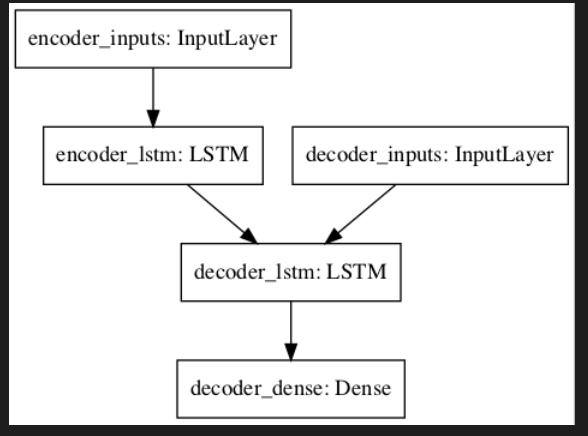

# The Model architecture is explined in the diagram above

# Test-5

<ol>
<li> Step 1: Use a LSTM encoder to get input words encoded in the form of (encoder outputs, encoder hidden state, encoder context) from input words
<li> Step 2:  Use a LSTM decoder to get target words encoded in the form of (decoder outputs, decoder hidden state, decoder context) from target words. Use encoder hidden states and encoder context (represents input memory) as initial state .
<li> Step 3: Use a dense layer to predict the next token out of the vocabulary given decoder output generated by Step 2.
<li> Step 4: Use loss ='categorical_crossentropy' and optimizer='rmsprop'
</ol>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers , activations , models , preprocessing , utils
import pandas as pd


In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense

In [ ]:
def create_lstm_encoder_decoder(input_vocab_size, target_vocab_size, latent_dim):
    # Encoder
    encoder_inputs = Input(shape=(None, input_vocab_size))
    encoder_lstm, state_h, state_c = LSTM(latent_dim, return_state=True)(encoder_inputs)
    encoder_states = [state_h, state_c]

    # Decoder
    decoder_inputs = Input(shape=(None, target_vocab_size))
    decoder_lstm, _, _ = LSTM(latent_dim, return_sequences=True, return_state=True)(decoder_inputs, initial_state=encoder_states)

    # Dense layer for prediction
    dense_layer = Dense(9742, activation='softmax')
    decoder_outputs = dense_layer(decoder_lstm)

    # Model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    # Compile the model
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
model = create_lstm_encoder_decoder(100,100,256)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, 100)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None, 100)]          0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 256),                365568    ['input_1[0][0]']             
                              (None, 256),                                                        
                              (None, 256)]                                                        
                                                                                              

In [ ]:
model1 = create_lstm_encoder_decoder(100,100,256)

In [ ]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, 100)]          0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, None, 100)]          0         []                            
                                                                                                  
 lstm_2 (LSTM)               [(None, 256),                365568    ['input_3[0][0]']             
                              (None, 256),                                                        
                              (None, 256)]                                                        
                                                                                            

# Check-5

Check the model summary should look like this

In [ ]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, 100)]          0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, None, 100)]          0         []                            
                                                                                                  
 lstm_2 (LSTM)               [(None, 256),                365568    ['input_3[0][0]']             
                              (None, 256),                                                        
                              (None, 256)]                                                        
                                                                                            

Model Check as compared earlier is passed. Please note the vocabulary in the context of this notebook is 9742 so the last dense layer output is limited to 9742 enteries.

In [ ]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_inputs (InputLayer)     (None, None, 100)    0                                            
__________________________________________________________________________________________________
decoder_inputs (InputLayer)     (None, None, 100)    0                                            
__________________________________________________________________________________________________
encoder_lstm (LSTM)             [(None, 256), (None, 365568      encoder_inputs[0][0]             
__________________________________________________________________________________________________
decoder_lstm (LSTM)             [(None, None, 256),  365568      decoder_inputs[0][0]             
                                                                 encoder_lstm[0][1]               
          

**Fitting the model and doing some prelim predictions**

Initaling fitting the model with only one iteration of train data. This is just for testing.

In [ ]:
[encoder_input_data1 , decoder_input_data1], decoder_target_data1 = next(train_gen)

In [ ]:
model1.fit([encoder_input_data1 , decoder_input_data1], decoder_target_data1, batch_size=32, epochs=10 )
model1.save( 'model1.h5' )

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 324316.1875 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 897ms/step - loss: 324304.2188 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 324307.0312 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 324505.5625 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 324573.2500 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 324699.7812 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 1s 786ms/step - loss: 324808.2812 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 1s 748ms/step - loss: 324887.8438 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 1s 771ms/step - loss: 324950.5625 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
input_texts_word2em[0][0]

array([ 0.096828,  0.96216 ,  0.26631 ,  0.1745  , -0.37467 ,  0.26376 ,
        0.49862 , -0.074503,  0.10588 ,  0.27578 , -0.10256 ,  0.16923 ,
       -4.7434  ,  0.4171  ,  0.086999,  0.031635,  0.3348  , -0.17257 ,
       -0.516   ,  0.01793 ,  0.24739 , -0.35023 , -0.18885 ,  0.20731 ,
        0.075228,  0.041435,  0.27558 ,  0.1194  ,  0.2924  , -0.4688  ,
       -0.59928 ,  0.3397  , -0.055966,  0.30236 , -0.086538,  0.82669 ,
        0.29416 , -0.44259 ,  0.45672 ,  0.33513 , -0.40102 ,  0.14918 ,
       -0.07679 ,  0.11941 ,  0.042608,  0.18343 ,  0.29211 , -0.9592  ,
       -0.13515 ,  0.39735 , -0.23312 , -0.31683 ,  0.35152 , -0.45224 ,
        0.72213 ,  0.21249 , -0.20733 ,  0.52236 ,  0.37562 , -0.38926 ,
        0.20423 , -0.14156 , -0.092994,  0.41954 , -0.056686,  0.03899 ,
       -0.61005 , -0.32958 , -0.50119 , -0.28287 ,  0.38674 , -0.16925 ,
        0.71155 ,  0.37228 ,  0.51185 ,  0.2022  ,  0.5125  , -0.1919  ,
       -0.29209 , -0.076765,  1.7907  ,  0.17052 , 

In [ ]:
input_texts_word2em[2][0]

array([ 3.2076e-02,  9.0676e-01,  3.1419e-01,  1.4165e-01, -3.4985e-01,
        4.5870e-01,  7.8743e-01,  7.9159e-02,  3.1101e-01,  1.1654e-01,
       -8.4201e-02, -1.2298e-01, -4.9626e+00,  8.4222e-02, -7.1227e-01,
       -4.1164e-01, -2.9763e-01,  2.1770e-01,  3.3573e-02, -2.2389e-01,
       -4.1938e-02,  7.4092e-02, -1.4175e-01,  3.1477e-01,  1.8099e-01,
       -1.7520e-01,  5.8105e-01,  3.6371e-01,  6.1984e-02, -4.8160e-01,
       -4.0318e-01, -1.9009e-01, -3.1980e-01,  7.7435e-01,  2.4191e-01,
        5.2341e-01, -1.3669e-01, -2.2893e-01,  9.5895e-02,  2.9128e-04,
       -6.6452e-01,  8.2740e-02,  1.7683e-01, -5.5643e-02,  4.1171e-01,
        4.0244e-02,  3.0529e-01, -2.7427e-01, -3.0539e-02,  4.4709e-01,
        2.0210e-02, -2.8307e-01,  9.0796e-01,  4.2457e-02,  1.4095e-01,
       -6.0346e-01, -4.9815e-01,  6.4657e-01, -1.7250e-01,  4.2005e-01,
        3.1790e-01, -3.4210e-02, -3.0226e-01,  2.4460e-01, -8.3227e-02,
       -3.9928e-01, -6.9852e-02, -5.8187e-02, -7.0117e-01,  2.56

In [ ]:
p1 = "good"

In [ ]:
p1 = word2embedding[p1]

In [ ]:
word2embedding['do']

array([-2.3741e-01, -2.2434e-01,  9.1622e-01, -5.8550e-02, -1.6511e-01,
        2.5111e-01,  6.0232e-01, -5.0023e-01,  5.4699e-01,  6.9742e-01,
       -2.0822e-01, -1.1138e+00, -5.3540e+00,  4.4314e-01, -5.4168e-01,
       -1.7297e-01, -8.2312e-01, -2.0724e-01,  5.2782e-01, -2.1240e-01,
        2.9266e-02, -7.1848e-02, -1.3079e-01, -7.4409e-02,  3.6398e-01,
       -1.7687e+00,  5.0954e-01,  7.1843e-01,  1.6063e-01, -1.3972e-01,
        9.4257e-01, -4.2210e-01,  4.7313e-02, -4.6057e-01, -1.0714e+00,
       -2.8972e-03,  1.9650e-01, -5.9106e-01, -1.1389e+00,  1.5337e-01,
       -2.1414e+00,  7.8533e-01,  1.0681e-01, -1.0814e-01, -6.3045e-01,
        2.1288e-01, -9.9607e-02, -4.1917e-01, -5.7476e-01, -1.1047e+00,
        5.3964e-01,  4.9028e-01,  2.6830e-01,  2.7167e-01,  1.6113e-01,
        4.2814e-01, -9.7108e-01,  7.5670e-01, -2.8024e-02,  5.9043e-01,
       -2.5249e-01, -1.4199e-01,  3.4776e-01,  8.7260e-02,  1.6208e-01,
       -1.3040e-01,  2.7808e-02, -2.5873e-01, -1.1011e-02,  1.36

In [ ]:
type(p1)

numpy.ndarray

In [ ]:
p1.shape

(100,)

In [ ]:
p2 = np.pad(p1, (127900, 0), 'constant', constant_values=(0, 0))
p2 = p2.reshape(32,encoder_max_seq_length,GLOVE_EMBEDDING_SIZE)

In [ ]:
p2.shape

(32, 40, 100)

In [ ]:
p3 = np.pad(p1, (134300, 0), 'constant', constant_values=(0, 0))
p3 = p3.reshape(32,decoder_max_seq_length,GLOVE_EMBEDDING_SIZE)

In [ ]:
p4 = np.pad(p1, (127900, 0), 'constant', constant_values=(0, 0))
p4 = p4.reshape(32,encoder_max_seq_length,GLOVE_EMBEDDING_SIZE)

In [ ]:
y = model1.predict([p2,p4],9702)

1/1 [==============================] - 3s 3s/step


In [ ]:
y.shape

(32, 40, 9742)

In [ ]:
y[0][0]


array([1.3096258e-04, 1.1071931e-04, 5.0569699e-05, ..., 8.6397646e-05,
       1.0339828e-04, 8.7820627e-05], dtype=float32)

In the predicted result find the first word of the response. The output of the model is of shape (32,40,9742 ). Since this is sequnce to sequence problem so we are ideally interested in max probability word  in the 40 sequences generated in first batch.

predicted_array[0][0][value with highest probability]

In [ ]:
sum = 0

for i in range(0,9742):
  sum = sum + y[0][0][i]


In [ ]:
sum

0.9999999850010681

In [ ]:
max1 = 0
max_index1 = 0

for i in range(0,9742):
  if (max1 < y[0][3][i]):
      max1 = y[0][0][i]
      max_index1 = i



In [ ]:
max1

0.0002050376

In [ ]:
max_index1

6439

In [ ]:
target_idx2word_new1[6439]

'gaston'

Creating one more model this one would be trained for 30 batches ( due to resource  restrictions ) and analying the results.

In [ ]:
model2 = create_lstm_encoder_decoder(100,100,256)

In [ ]:
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, None, 100)]          0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, None, 100)]          0         []                            
                                                                                                  
 lstm_4 (LSTM)               [(None, 256),                365568    ['input_5[0][0]']             
                              (None, 256),                                                        
                              (None, 256)]                                                        
                                                                                            

In [ ]:
for i in range(0,30):

  [encoder_input_data1 , decoder_input_data1], decoder_target_data1 = next(train_gen)
  model2.fit([encoder_input_data1 , decoder_input_data1], decoder_target_data1, batch_size=32, epochs=10 )

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 324311.5625 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 839ms/step - loss: 324301.5312 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 1s 799ms/step - loss: 324294.9062 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 1s 805ms/step - loss: 324327.0625 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 1s 797ms/step - loss: 324406.4375 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 1s 789ms/step - loss: 324548.4375 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 1s 795ms/step - loss: 324675.2188 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 1s 755ms/step - loss: 324774.0625 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 1s 758ms/step - loss: 324839.1875 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [=======================

Save the model for later use

In [ ]:
model2.save( 'model2.h5' )

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
input_test_seq = "how are you"

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model2=load_model('model2.h5')

Code to encode a sequence which is used as test to see the results from the model

In [ ]:


def encode_1(s):
  j=0
  splitStr = s.split(" ");
  #print(splitStr)
  for i in range(0,len(splitStr)):
    if(i == 0):
      in_arr = word2embedding[s[i]]
      #print(in_arr.shape)

    else:
      #print(word2embedding[s[i]].shape)
      in_arr = np.append(in_arr, word2embedding[s[i]])

  pad_factor1 = 32*40*100 - len(splitStr)*100
  pad_in_arr = np.pad(in_arr, (0, pad_factor1), 'constant', constant_values=(0, 0))
  pad_in_arr1 = pad_in_arr.reshape(32,40,100)
  #print(pad_in_arr1.shape)

  '''
  pad_in_arr1 = np.pad(pad_in_arr1, (124000, 0), 'constant', constant_values=(0, 0),axis=0)
  print(pad_in_arr.shape)
  pad_in_arr1 = pad_in_arr1.reshape(32,40,100)
  '''

  return pad_in_arr1


In [ ]:
input_test_seq = "how are you"

In [ ]:
input_test_array = encode_1(input_test_seq)

['how', 'are', 'you']
(100,)
(100,)
(100,)


In [ ]:
input_test_array.shape

(32, 40, 100)

In [ ]:
x = model2.predict([input_test_array,input_test_array])

1/1 [==============================] - 4s 4s/step


In [ ]:
max1 = 0
max_index1 = 0


for i in range(0,9742):
  if (max1 < x[0][0][i]):
      max1 = x[0][0][i]
      max_index1 = i

In [ ]:
max1

0.00022670299

In [ ]:
max_index1



6674

In [ ]:
target_idx2word_new1[6674]

'tourist'

# Prediction

In [ ]:
def prediction1(pred):
  print("##############.  Printing the prediction from four sequences of the predicted Array.  #################")
  print("  ")
  max_index1 = []
  for i in range(0,4):
    max1 = 0


    for j in range(0,9742):
      if (max1 < pred[0][i][j]):
            max1 = pred[0][i][j]
            index = j
    max_index1.append(index)
    #print(max_index1)

  for item in max_index1:
    print(target_idx2word_new1[item],end =" ")




In [ ]:
input_test_seq1 = "can i speak"

In [ ]:
decode_test_seq2 = "speak i can"

In [ ]:
input_test_array1 = encode_1(input_test_seq1)
input_test_array2 = encode_1(decode_test_seq2)

In [ ]:
input_test_array1.shape

(32, 40, 100)

In [ ]:
input_test_array2.shape

(32, 40, 100)

In [ ]:
pred = model2.predict([input_test_array1,input_test_array2])

1/1 [==============================] - 0s 304ms/step


In [ ]:
prediction1(pred)

##############.  Printing the prediction from four sequences of the predicted Array.  #################
  
tourist crunch brain well 

In [ ]:
********************************************************.  END **********************************************************